In [3]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df=pd.read_csv('/content/Copy of Tabel Berita - Tabel Berita.csv')
df.head()

,portal,title,penulis,published_at,crawled_at,berita
0,antara,Pramono janji lanjutkan program BOTI demi mera...,Luthfia Miranda Putri,"Rabu, 2 Oktober 2024 19:56 WIB",2024-10-02 21:23:45.855292,Jakarta (ANTARA) - Calon Gubernur pada Pilkada...
1,antara,MPR tetapkan susunan fraksi periode 2024-2029,Melalusa Susthira Khalida,"Rabu, 2 Oktober 2024 13:44 WIB",2024-10-02 21:23:52.120513,Jakarta (ANTARA) - Majelis Permusyawaratan Rak...
2,antara,Manchester City menang telak 4-0 atas Slovan B...,Hendri Sukma Indrawan,"Rabu, 2 Oktober 2024 05:23 WIB",2024-10-02 21:23:58.730488,Jakarta (ANTARA) - Manchester City menang tela...
3,antara,KPK periksa anggota pokja pengadaan truk Basarnas,Fianda Sjofjan Rassat,"Selasa, 1 Oktober 2024 20:19 WIB",2024-10-02 21:24:06.201078,"""Pemeriksaan dilakukan di Gedung KPK Merah Put..."
4,antara,Sultan Najamudin terpilih jadi Ketua DPD 2024-...,Bagus Ahmad Rizaldi,"Rabu, 2 Oktober 2024 02:20 WIB",2024-10-02 21:24:11.934446,Mantan Wakil Ketua DPD RI periode sebelumnya i...


In [5]:
df = df.drop(columns=['portal', 'penulis', 'published_at', 'crawled_at'])


In [6]:
df.head()

,title,berita
0,Pramono janji lanjutkan program BOTI demi mera...,Jakarta (ANTARA) - Calon Gubernur pada Pilkada...
1,MPR tetapkan susunan fraksi periode 2024-2029,Jakarta (ANTARA) - Majelis Permusyawaratan Rak...
2,Manchester City menang telak 4-0 atas Slovan B...,Jakarta (ANTARA) - Manchester City menang tela...
3,KPK periksa anggota pokja pengadaan truk Basarnas,"""Pemeriksaan dilakukan di Gedung KPK Merah Put..."
4,Sultan Najamudin terpilih jadi Ketua DPD 2024-...,Mantan Wakil Ketua DPD RI periode sebelumnya i...


In [8]:
def lowercase(review_text):
    if isinstance(review_text, str):
        return review_text.lower()
    else:
        return review_text  # Return the original value if it's not a string

# Apply the lowercase function to both columns
df['berita'] = df['berita'].apply(lowercase)
df['title'] = df['title'].apply(lowercase)


In [10]:
import re

def remove_extra_whitespaces(review_text):
    if isinstance(review_text, str):  # Check if it's a string
        return re.sub(r'\s+', ' ', review_text)
    else:
        return review_text  # Return the original value if it's not a string

# Apply the function to both columns
df['berita'] = df['berita'].apply(remove_extra_whitespaces)
df['title'] = df['title'].apply(remove_extra_whitespaces)


In [12]:
def remove_special_characters(text):
    if isinstance(text, str):  # Check if it's a string
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    else:
        return text  # Return the original value if it's not a string

# Apply the function to both columns
df['berita'] = df['berita'].apply(remove_special_characters)
df['title'] = df['title'].apply(remove_special_characters)


In [13]:
df.head(5)

,title,berita
0,pramono janji lanjutkan program boti demi mera...,jakarta antara calon gubernur pada pilkada dk...
1,mpr tetapkan susunan fraksi periode 20242029,jakarta antara majelis permusyawaratan rakyat...
2,manchester city menang telak 40 atas slovan br...,jakarta antara manchester city menang telak 4...
3,kpk periksa anggota pokja pengadaan truk basarnas,pemeriksaan dilakukan di gedung kpk merah puti...
4,sultan najamudin terpilih jadi ketua dpd 20242029,mantan wakil ketua dpd ri periode sebelumnya i...


In [15]:
df['title']=df['title'].apply(lambda x : 'sostok ' + str(x) + ' eostok')

In [16]:
df.head()

,title,berita
0,sostok pramono janji lanjutkan program boti de...,jakarta antara calon gubernur pada pilkada dk...
1,sostok mpr tetapkan susunan fraksi periode 202...,jakarta antara majelis permusyawaratan rakyat...
2,sostok manchester city menang telak 40 atas sl...,jakarta antara manchester city menang telak 4...
3,sostok kpk periksa anggota pokja pengadaan tru...,pemeriksaan dilakukan di gedung kpk merah puti...
4,sostok sultan najamudin terpilih jadi ketua dp...,mantan wakil ketua dpd ri periode sebelumnya i...


In [17]:
df['word_count_text']=df['berita'].apply(lambda x: len(str(x).split()))
for i in range(0, 100, 10):
    var = df['word_count_text'].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i, var[int(len(var) * (float(i) / 100))]))

print("100 percentile value is", var[-1])


0 percentile value is 86
10 percentile value is 223
20 percentile value is 258
30 percentile value is 288
40 percentile value is 312
50 percentile value is 338
60 percentile value is 363
70 percentile value is 398
80 percentile value is 443
90 percentile value is 536
100 percentile value is 1569


In [18]:
for i in range(90, 100):
    var = df['word_count_text'].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i, var[int(len(var) * (float(i) / 100))]))

print("100 percentile value is", var[-1])


90 percentile value is 536
91 percentile value is 557
92 percentile value is 581
93 percentile value is 600
94 percentile value is 620
95 percentile value is 641
96 percentile value is 690
97 percentile value is 760
98 percentile value is 865
99 percentile value is 1032
100 percentile value is 1569


In [71]:
max_len_text=641
max_len_title=20

In [81]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(df["berita"]),
    np.array(df["title"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [82]:
# Tokenize the text to get the vocab count
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [83]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1

print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  79.57613112044625


In [84]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 11864


In [85]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1

print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_len_title, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_title, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 81.20519279209456
Size of vocabulary in Y = 971


In [86]:
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, TimeDistributed
from tensorflow.keras.models import Model

latent_dim = 300  # Size of the RNN layer
embedding_dim = 200  # Size of the embedding layer

# Encoder
encoder_inputs = Input(shape=(max_len_text,))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder SimpleRNN 1
encoder_rnn1 = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
encoder_output1, state_h1 = encoder_rnn1(enc_emb)

# Encoder SimpleRNN 2
encoder_rnn2 = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2 = encoder_rnn2(encoder_output1)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None,))

# Embedding layer for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder SimpleRNN
decoder_rnn = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, decoder_state = decoder_rnn(dec_emb, initial_state=[state_h2])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 641)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 641, 200)       │      2,372,800 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_19            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_9 (SimpleRNN)  │ [(None, 641, 300),     │        150,300 │ embedding_6[0][0]      │
│                           │ (None, 300)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 200)      │        194,200 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_10 (SimpleRNN) │ [(None, 641, 300),     │        180,300 │ simple_rnn_9[0][0]     │
│                           │ (None, 300)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_11 (SimpleRNN) │ [(None, None, 300),    │        150,300 │ embedding_7[0][0],     │
│                           │ (None, 300)]           │                │ simple_rnn_10[0][1]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_3        │ (None, None, 971)      │        292,271 │ simple_rnn_11[0][0]    │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,340,171 (12.74 MB)

 Trainable params: 3,340,171 (12.74 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr[:, 1:],
    epochs=5,
    callbacks=[early_stopping],
    batch_size=128,
    validation_data=([x_val, y_val[:, :-1]], y_val[:, 1:])
    )


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.5082 - loss: 4.5522 - val_accuracy: 0.6073 - val_loss: 2.5000
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 0.6202 - loss: 2.5227 - val_accuracy: 0.6627 - val_loss: 2.2174
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.6522 - loss: 2.2765 - val_accuracy: 0.6639 - val_loss: 2.1587
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - accuracy: 0.6558 - loss: 2.2056 - val_accuracy: 0.6641 - val_loss: 2.1457
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.6588 - loss: 2.1766 - val_accuracy: 0.6651 - val_loss: 2.1391


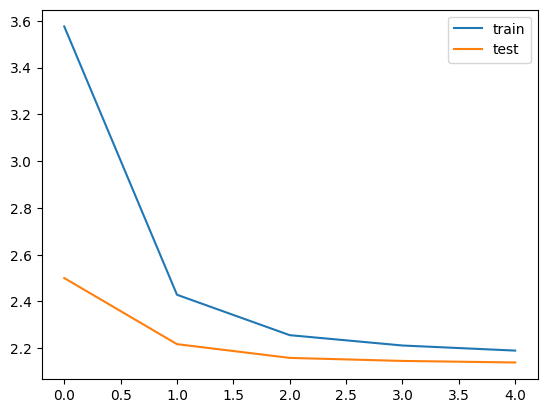

In [89]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [93]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define start and end tokens using sostok and eostok
start_token = x_tokenizer.word_index.get('sostok', 1)
end_token = x_tokenizer.word_index.get('eostok', 0)

# Prepare encoder input by tokenizing and padding
encoder_input = x_tokenizer.texts_to_sequences(df['berita'])
encoder_input = pad_sequences(encoder_input, maxlen=max_len_text)

summaries = []

# Function for sampling with a temperature parameter
def sample_with_temperature(predictions, temperature=0.8):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-7) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(predictions), p=predictions)

for i in range(10):
    decoder_input = np.array([[start_token]])
    generated_tokens = []

    for _ in range(max_len_title):
        predictions = model.predict([encoder_input[i:i+1], decoder_input])

        # Use sampling to add variability and avoid repetition
        predicted_token = sample_with_temperature(predictions[0, -1, :])

        if predicted_token == end_token:
            break

        generated_tokens.append(predicted_token)
        decoder_input = np.array([[predicted_token]])

    # Decode generated tokens to readable text
    generated_summary = ' '.join([x_tokenizer.index_word.get(token, '') for token in generated_tokens])
    summaries.append(generated_summary)

# Display results
result_df = pd.DataFrame({
    'title': df['title'][:10],
    'generated_summary': summaries
})

print(result_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [96]:
for i, (title, summary) in enumerate(zip(df['title'][:10], summaries), 1):
    print(f"\nArticle {i}:")
    print(f"Title: {title}")
    print(f"Generated Summary: {summary}\n")



Article 1:
Title: sostok pramono janji lanjutkan program boti demi merangkul umat beragama eostok
Generated Summary: kemungkinan ini kpu ada sah masingmasing baru pada dalam mengambil adalah tangerang badan jalan indonesia jadwal jakarta melawan masingmasing kesehatan


Article 2:
Title: sostok mpr tetapkan susunan fraksi periode 20242029 eostok
Generated Summary: paslon pasar beberapa i menyebut maupun ketua jawab tanggal hak paslon agar jawa 2023 tak paslon pemilihan cianjur menegaskan anies


Article 3:
Title: sostok manchester city menang telak 40 atas slovan bratislava eostok
Generated Summary: menyebut pilkada antara membawa senin jakarta dpr pada i pendukung antara jakarta agar depan jakarta jakarta anggota liga jakarta pada


Article 4:
Title: sostok kpk periksa anggota pokja pengadaan truk basarnas eostok
Generated Summary: pak jawab mendukung provinsi kami juga surabaya with khofifah termasuk ketua menegaskan nanti pencalonan partai ingin meraih ketua andika akan


Article 5